![Kickstarter](kickstarter_logo.png)

# Analysis of Data from Kickstarter Projects
### Data taken from Kaggle (https://www.kaggle.com/kemical/kickstarter-projects)

# Zielfragestellung: Gibt es Trends in den Erfolgen von Projekten? Sind manche Kategorien erfolgreicher als andere, und wenn ja wieso?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

filename = 'data/ks-projects-201801.csv'
df = pd.read_csv(filename)

In [2]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


The first look at the data shows that there are some interesting questions one can ask about the Projects of Kickstarter. <br>
Some possible questions are:
> What (main) category is typically the most successful? <br>
What are people willing to pledge for different categories? <br>
Is there a threshold for the money, at which most projects fail? <br>
Is it possible to predict the success ratio based on the other values? <br>
What countries do have the most successful projects? What country do the most backers come from? <br>
What impact does the deadline have on the backers and on the state? Do people tend to pledge more if the deadline is near or far? <br>

I'm going to take a closer look at the following questions:
> What (main) category is typically the most successful? <br>
What are people willing to pledge (avg, median, mode) for different categories? <br>
What impact does the deadline have on the backers and on the state? Do people tend to pledge more if the deadline is near or far? <br>

In [3]:
# remove columns which aren't used during analysis
df.drop(['usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1, inplace=True)

# convert launched and deadline columns
from datetime import datetime
df['launched'] = df['launched'].apply(lambda x: datetime.strptime(x[:10], "%Y-%m-%d"))
df['deadline'] = df['deadline'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,year_launched,year_deadline,month_launched,month_deadline
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,2015,2015,08,10
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2017,2017,09,11
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,2013,2013,01,02
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,2012,2012,03,04
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,2015,2015,07,08


First: Take a look at how the projects vary -> are there only big projects or smaller ones too?

In [5]:
# What is the average (,median, mode) amount of money, people want for their project?
mean_goal = int(np.mean(df['goal']))
std_goal = int(df['goal'].describe()['std'])
median_goal = int(np.median(df['goal']))
mode_goal = int(df['goal'].value_counts().index[0])
print("{}€ is the average goal, {}€ the mean goal and {}€ the mode goal.".format(mean_goal, median_goal, mode_goal))
print("There is a standard deviation of {}".format(std_goal))

49080€ is the average goal, 5200€ the mean goal and 5000€ the mode goal.
There is a standard deviation of 1183391


### What (main) category is typically the most successful? Are there categories which are more likely to succeed / fail?

In [6]:
overall_states = df['state'].value_counts(normalize=True)

In [7]:
from collections import defaultdict
group_cat_to_state = df.groupby(['main_category'])['state'].value_counts(normalize=True)
cat_state_dict = defaultdict(dict)
for idx, value in enumerate(group_cat_to_state):
    cat, state = group_cat_to_state.index[idx]
    cat_state_dict[cat][state] = value # example: Art & Failed -> 14039

In [8]:
X = []
Y = []
Annotations = []
for cat, state_value_dict in cat_state_dict.items():
    for state, value in state_value_dict.items():
        X.append(state)
        Y.append(value)
        Annotations.append(cat)
        #print(cat, state, value)

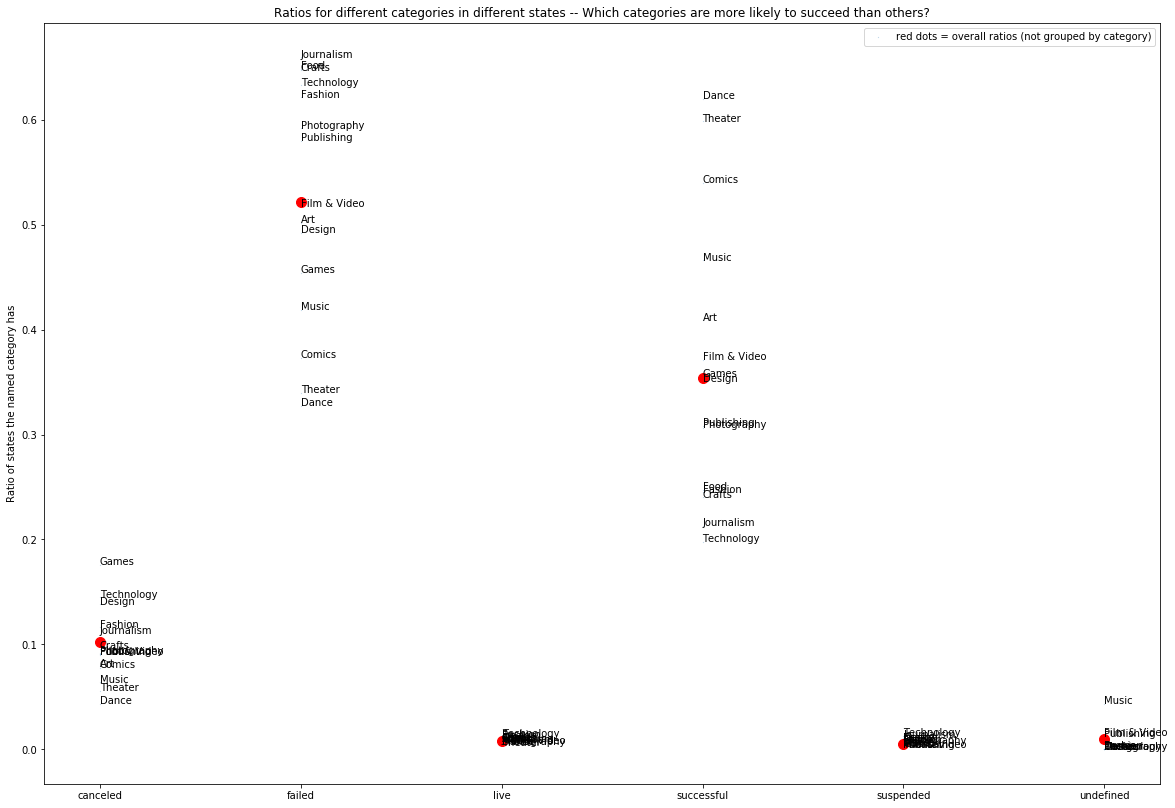

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 14)
ax.scatter(x=X, y=Y, s=0.01) # data point is too small to see (-> show only text)
for i, txt in enumerate(Annotations):
    ax.annotate(txt, (X[i], Y[i])) # places the text annotation at the data point
ax.scatter(x=list(overall_states.index), y=list(overall_states.values), s=100, c='r') # overall states ratio
plt.ylabel("Ratio of states the named category has")
plt.title("Ratios for different categories in different states -- Which categories are more likely to succeed than others?")
plt.legend(["red dots = overall ratios (not grouped by category)"])
plt.show()

In [10]:
successful_cats = ['Dance', 'Theater', 'Comics', 'Music', 'Art']
failed_cats = ['Journalism', 'Food', 'Crafts', 'Technology', 'Fashion', 'Photography', 'Publishing']
canceled_cats = ['Games', 'Technology', 'Design', 'Fashion', 'Journalism']
unsuccessful_cats = list(set().union(failed_cats, canceled_cats)) # merges failed and canceled cats

In [11]:
df.loc[df['main_category'].isin(['Dance', 'Theater', 'Comics'])]['goal'].mean() #Projects where more than 50% are successful

21901.035341176474

### Is there a threshold for the money, at which most projects fail?

In [12]:
df.groupby(['state'])['goal'].median()

state
canceled      10000.0
failed         7500.0
live           7500.0
successful     3923.0
suspended      5000.0
undefined      3500.0
Name: goal, dtype: float64

In [13]:
df.groupby(['main_category','state'])['goal'].median().loc[successful_cats].groupby(['state']).median()

state
canceled       5000.0
failed         5000.0
live           2900.0
successful     2650.0
suspended      2000.0
undefined     25000.0
Name: goal, dtype: float64

In [14]:
df.groupby(['main_category','state'])['goal'].median().loc[failed_cats].groupby(['state']).median()

state
canceled       7000.0
failed         5000.0
live           5000.0
successful     3000.0
suspended      4800.0
undefined     12000.0
Name: goal, dtype: float64

In [15]:
df.groupby(['main_category','state'])['goal'].median().loc[canceled_cats].groupby(['state']).median()

state
canceled      13000.0
failed        10000.0
live           7000.0
successful     5000.0
suspended      5000.0
undefined     25000.0
Name: goal, dtype: float64

### Can the insights be combined?
-> Projekte, die zu den erfolgreichen gehören, haben z.B. generell ein geringeres Preisziel oder ähnliches

### Did the project goals change through time?

In [16]:
df.sort_values(by='deadline', inplace=True)

In [17]:
def moving_avg(df, col, k):
    averages = []
    for idx, row in enumerate(df[col]):
        if idx < k:
            averages.append(round(df[col].iloc[0:idx+1].mean()))
        else:
            #idx = 10
            # k = 3
            # -> 8, 9, 10
            averages.append(round(df[col].iloc[idx - k:idx].mean()))
    #df.sort_index()
    return averages

In [18]:
k = 10000 # value, at which the curves get smoother
moving_avgs = {}
deadlines = {}
for cat in (successful_cats + unsuccessful_cats):
    moving_avgs[cat] = moving_avg(df.loc[df['main_category'] == cat], 'goal', k)
    deadlines[cat] = df['deadline'].loc[df['main_category'] == cat]

In [19]:
def plot_change_in_goalsize(moving_avgs, deadlines, col):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 14)
    if col in successful_cats:
        c = 'b'
    elif col in unsuccessful_cats:
        c = 'r'
    else:
        c = 'k'
    ax.plot(deadlines[col], moving_avgs[col], c=c)
    left, right = plt.xlim()
    left += 158.15
    right -= 2 * 158.15
    plt.xticks(np.linspace(left, right, 9), ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation=90)
    plt.title("Changing goal size through the years")
    plt.show()

In [20]:
def plot_stats_per_year(df, col):
    years = []
    states = []
    values = []
    df_states_in_tech_per_year = df.groupby(['main_category', 'year_deadline'])['state'].value_counts(normalize=True).loc[col]
    for idx in range(len(df_states_in_tech_per_year)):
        state = df_states_in_tech_per_year.index[idx][1]
        if state in ['successful', 'canceled', 'failed']:
            years.append(df_states_in_tech_per_year.index[idx][0])
            states.append(state)
            values.append(df_states_in_tech_per_year.values[idx])
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    for i, txt in enumerate(years):
        ax.annotate(txt, (states[i], values[i]))
    ax.scatter(states, values, s=0.01)
    plt.title("Stats for Category '{}'".format(col))
    plt.show()

# Vergleich von zwei Kategorien (erfolgreich vs. unerfolgreich)

Verlauf der Goal-Size

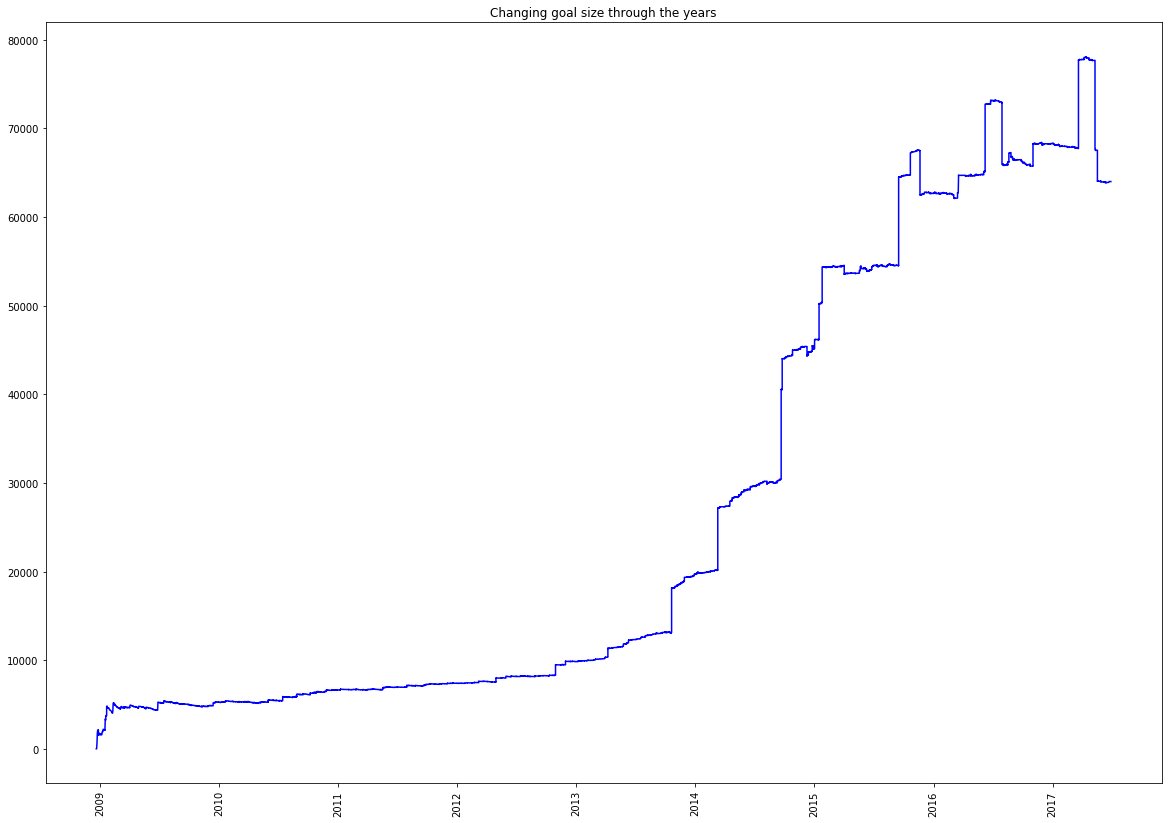

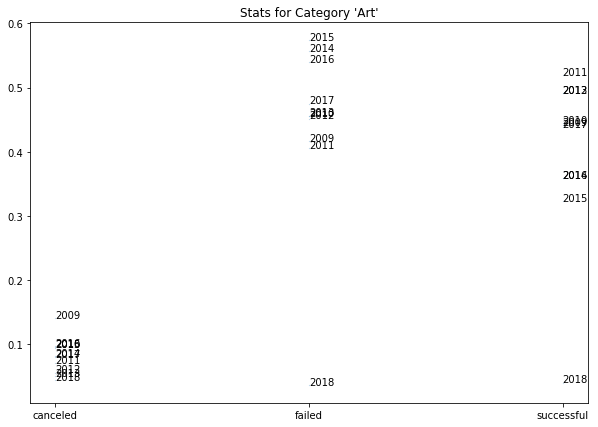

In [21]:
plot_change_in_goalsize(moving_avgs, deadlines, 'Art')
plot_stats_per_year(df, 'Art')

### since 2014, the projects aren't as successful anymore as they used to be - projects got much more expensive since then (up to 80,000USD)
-> Projects should have a goal size of roughly 20,000USD

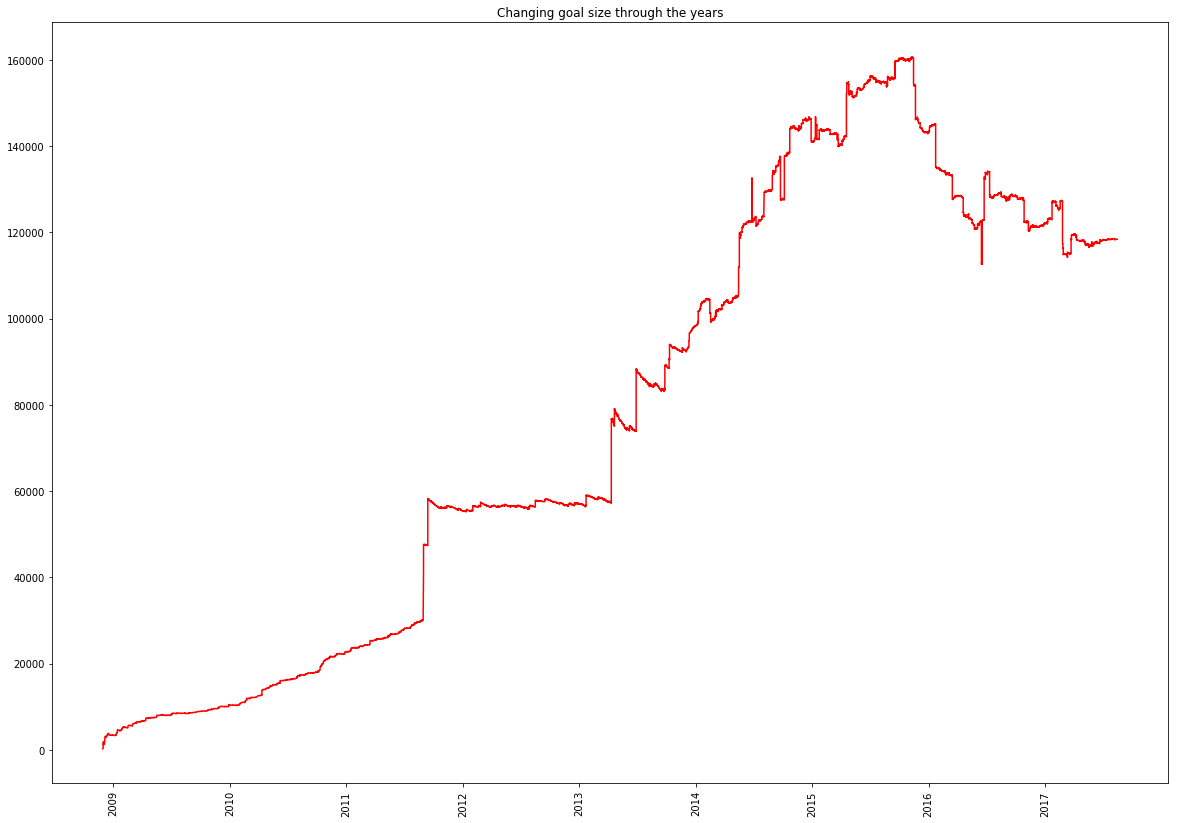

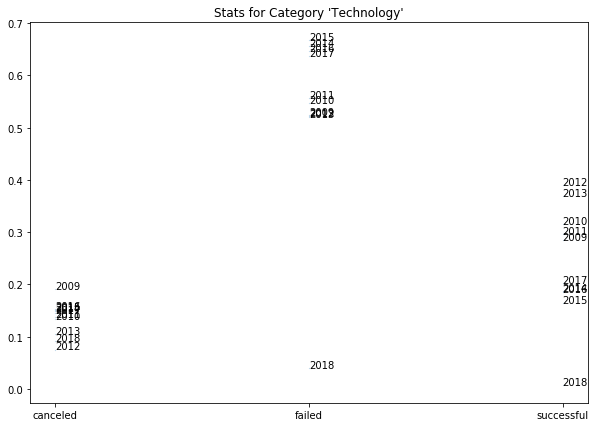

In [22]:
plot_change_in_goalsize(moving_avgs, deadlines, 'Technology')
plot_stats_per_year(df, 'Technology')

-> am Graphen von Technology lässt sich sehr gut erkennen, dass ab dem Anstieg der durchschnittlichen Kosten-ziele ab 2014 weniger Projekte erfolgreich durchgeführt wurden! <br>
-> auch bei Art sieht man seit 2015 ein Sinken der Erfolgsrate, aber nicht in dem gleichen Maße

bisherige Ergebnisse:
- es gibt bestimmte Kategorien, die deutlich erfolgreicher sind als andere (versuch zur erklärung, woran das liegt)
    - erfolgreiche Projekte sind i.d.R. günstiger
    - die Zeitreihenanalyse der beiden Kategorien Art und Technology ergaben, dass ab dem Punkt, an dem die Preise zu sehr stiegen, die Erfolgsraten maßgeblich gesunken sind
    - der Preis ist also maßgeblich entscheidend!
    
Vermutungen:
- die Anzahl der Backer unterscheidet sich
- die Projektlaufzeit ist unterschiedlich

### DURCHSCHNITTLICHE LAUFZEIT JE KATEGORIE (deadline - launched)

In [23]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,year_launched,year_deadline,month_launched,month_deadline
138572,1703704063,drawing for dollars,Illustration,Art,USD,2009-05-03,20.0,2009-04-24 21:52:03,35.0,successful,3,US,2009,2009,04,05
213711,2089078683,New York Makes a Book!!,Journalism,Journalism,USD,2009-05-16,3000.0,2009-04-28 13:55:41,3329.0,successful,110,US,2009,2009,04,05
342226,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Rock,Music,USD,2009-05-16,300.0,2009-04-29 05:26:32,15.0,failed,2,US,2009,2009,04,05
28960,1147015301,"""All We Had"" Gets Into Cannes -- $10 or More G...",Documentary,Film & Video,USD,2009-05-20,300.0,2009-04-30 22:10:30,40.0,failed,4,US,2009,2009,04,05
196244,199916122,Mr. Squiggles,Illustration,Art,USD,2009-05-22,30.0,2009-05-12 23:39:58,0.0,failed,0,US,2009,2009,05,05


### ANZAHL AN BACKERN